In [1]:
import pandas, numpy

import scipy, scipy.stats

import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':20, 'figure.figsize':(12, 8)})

# info
The original datafile is "EC45_Extracellular_Lactate_glutamate_Glucose in medium", linked __[here](https://reiknistofnun-my.sharepoint.com/:x:/g/personal/ottarr_hi_is/EU28aVXXoEFPmC7tfGtORxABBFC1KKf7D9TvIGul3hJJUg?email=adrian%40hi.is&e=4%3AxD72uJ&at=9)__. Only strictly required data has been stored in `PPP_flux.tsv`.

# 0. user-defined variables

In [2]:
input_data_file = 'PPP_flux.tsv'
treatments = [0, 0.5, 5]
bio_reps = [1, 2 , 3]

# 1. read data

In [3]:
df = pandas.read_csv(input_data_file, sep='\t', index_col=0)
df

,biological replicate,treatment,m1,m2
name,,,,
0 mM BR 1,1,0.0,0.01192,0.19685
0 mM BR 2,2,0.0,0.01149,0.19555
0 mM BR 3,3,0.0,0.01486,0.18064
0.5 mM BR1,1,0.5,0.00765,0.19531
0.5 mM BR2,2,0.5,0.01670,0.20229
0.5 mM BR3,3,0.5,0.01127,0.19243
5 mM BR1,1,5.0,0.00881,0.19632
5 mM BR2,2,5.0,0.01178,0.19487
5 mM BR3,3,5.0,0.01229,0.20159


# 2. generate figure

Pentose cycle ration is calculated from [Lee et al.](https://pubmed.ncbi.nlm.nih.gov/9612242/).
PC = (m1/m2)/(3 + m1/m2)

In [4]:
all_ratios = []
for treatment in treatments:
    local_ratios = []
    for bio_rep in bio_reps:
        m1 = df[(df['treatment'] == treatment) & (df['biological replicate'] == bio_rep)]['m1'].values[0]
        m2 = df[(df['treatment'] == treatment) & (df['biological replicate'] == bio_rep)]['m2'].values[0]
        
        pc = (m1/m2)/(3 + (m1/m2))
        pc100 = pc * 100
        
        print(treatment, bio_rep, m1, pc)
        
        local_ratios.append(pc100)
    
    print()
    all_ratios.append(local_ratios)    

0 1 0.01192 0.019785217521204376
0 2 0.01149 0.019209549603771692
0 3 0.01486 0.026689177053773484

0.5 1 0.00765 0.012887900535732334
0.5 2 0.0167 0.026781275558477795
0.5 3 0.01127 0.019148430066603234

5 1 0.00881 0.014738109975408602
5 2 0.01178 0.019752175589798623
5 3 0.01229 0.01991702589699543



In [5]:
# statistics
stat, pvalue = scipy.stats.mannwhitneyu(all_ratios[0], all_ratios[1])
print(all_ratios[0], all_ratios[1], pvalue)

print()
stat, pvalue = scipy.stats.mannwhitneyu(all_ratios[0], all_ratios[2])
print(all_ratios[0], all_ratios[2], pvalue)

[1.9785217521204375, 1.9209549603771692, 2.6689177053773485] [1.2887900535732335, 2.6781275558477797, 1.9148430066603235] 0.7

[1.9785217521204375, 1.9209549603771692, 2.6689177053773485] [1.4738109975408602, 1.9752175589798624, 1.991702589699543] 0.7


# 3. generate figure

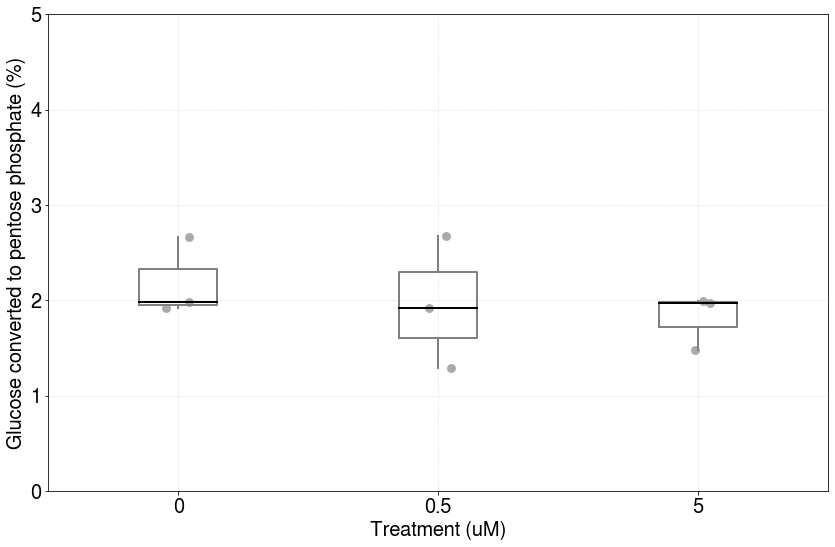

In [7]:
#
# boxplot
#
matplotlib.pyplot.boxplot(all_ratios, showcaps=False, medianprops=dict(linewidth=2, color='black'), boxprops=dict(linewidth=2, color='gray'), whiskerprops=dict(linewidth=2, color='gray'))

#
# scatter plot
#
x=[]; y=[]
for i in range(len(all_ratios)):
    for j in range(len(all_ratios[i])):
            
        shift = 0.1
        r=-shift/2 + shift*numpy.random.random()
        x.append(i+1+r)
            
        y.append(all_ratios[i][j])
            
matplotlib.pyplot.scatter(x, y, s=80, c='black', alpha=1/3, linewidths=0)

#
# close figure
#
matplotlib.pyplot.ylim([0, 5])

matplotlib.pyplot.xticks([1, 2, 3], ['0', '0.5', '5'])

matplotlib.pyplot.xlabel('Treatment (uM)')
matplotlib.pyplot.ylabel('Glucose converted to pentose phosphate (%)')

matplotlib.pyplot.grid(ls=':', alpha=0.5)
matplotlib.pyplot.tight_layout()    

matplotlib.pyplot.savefig('pc.svg')